# Vehicle Detection

The following sections exercise the various software components that were created for the Vehicle Detection project. The individual components are first exercised to verify that each component of the model works as expected. A complete pipeline is then created and used to process video files. Brief explanations regarding how each component works are provided here, but one should reference the **writeup.md** file in order to get a more thorough discussion of the approach taken and the accompanying code.

## Setup

### Imports (This loads all code written for this project)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from features import bin_spatial
from features import color_hist
from features import get_hog_features
from svm_train import prepare_data
from svm_train import train_svm
from window_search import find_cars
from window_search import get_heatmap
from window_search import draw_labeled_bboxes


%matplotlib inline

### Load Test Files

In [2]:
test_images = glob.glob('test_images/*.jpg')
num_test_images = len(test_images)
training_samples = glob.glob('training_data_sample/*.png')
num_training_samples = len(training_samples)

## Verify Individual Vehicle Detection Components

### Training Data Histograms and HOG

/opt/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


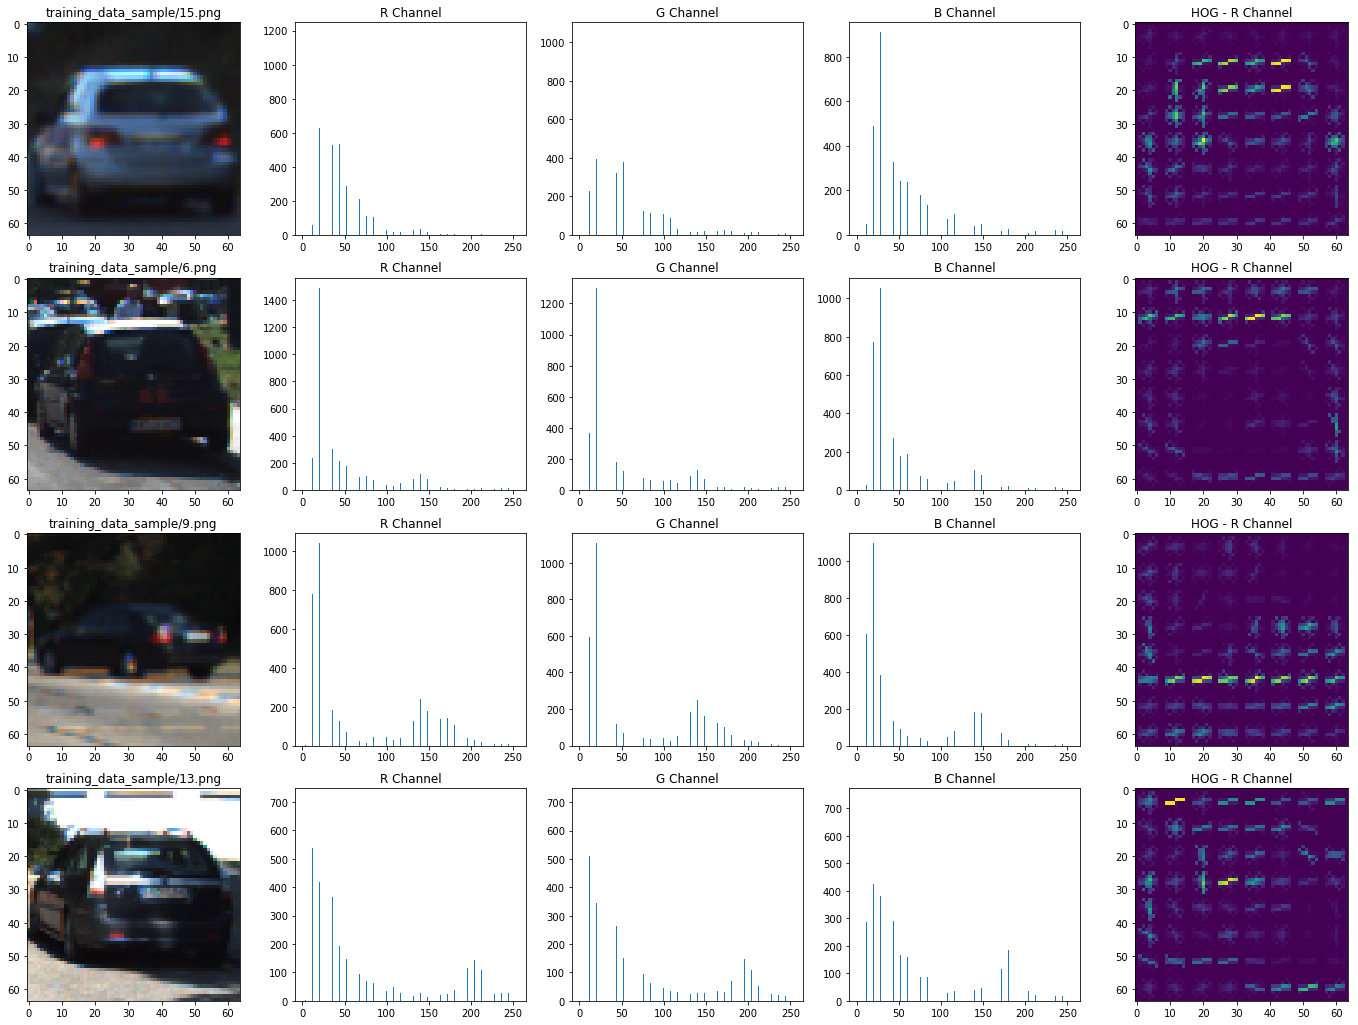

In [3]:
plt.figure(figsize=(24, 18))
i = 1

for img_file in training_samples:
    img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)
    r_hist = np.histogram(img[:, :, 0], bins=32, range=(0, 256))
    g_hist = np.histogram(img[:, :, 1], bins=32, range=(0, 256))
    b_hist = np.histogram(img[:, :, 2], bins=32, range=(0, 256))
    bin_edges = b_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    features, hog_image = get_hog_features(img[:, :, 0], 9, 8, 2, vis=True)
    
    ax1 = plt.subplot(num_training_samples, 5, i)
    ax1.set_title(str(img_file))
    ax1.imshow(img, cmap="gray")
    ax2 = plt.subplot(num_training_samples, 5, i+1)
    ax2.set_title("R Channel")
    ax2.bar(bin_centers, r_hist[0])
    ax3 = plt.subplot(num_training_samples, 5, i+2)
    ax3.set_title("G Channel")
    ax3.bar(bin_centers, g_hist[0])
    ax4 = plt.subplot(num_training_samples, 5, i+3)
    ax4.set_title("B Channel")
    ax4.bar(bin_centers, b_hist[0])
    ax5 = plt.subplot(num_training_samples, 5, i+4)
    ax5.set_title("HOG - R Channel")
    ax5.imshow(hog_image)
    #cv2.imwrite("output_images/" + img_file.split("/")[1].split(".")[0] + "_warped.jpg", cv2.cvtColor(img_warped, cv2.COLOR_RGB2BGR))
    i += 5

### Setup and Train SVM

In [7]:
X, y, X_scaler = prepare_data("training_data", return_scaler=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0, 100))
t = time.time()
svc = train_svm(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy = " + str(acc))

/opt/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


36.07 Seconds to train SVM...
Model Accuracy = 0.986768018018


### Sliding Window Search

In [ ]:
# These are all of the bounding boxes where we think we've found a car
bboxes = []
# For each image search a different region of the image at a certain scale (ystart, ystop, scale)
search_bounds = [(ystart, ystop, scale), (ystart, ystop, scale), (ystart, ystop, scale)]
for search_bound in search_bounds:
    found_bboxes = find_cars(search_bound[0], search_bound[1], search_bound[2], svc, X_scaler, 9, 8, 2)
    bboxes.append(found_bboxes)
    
# Draw each box

### Show Heatmap with False Positives Filtered

In [ ]:
# These are all of the bounding boxes where we think we've found a car
bboxes = []
# For each image search a different region of the image at a certain scale (ystart, ystop, scale)
search_bounds = [(ystart, ystop, scale), (ystart, ystop, scale), (ystart, ystop, scale)]
for search_bound in search_bounds:
    found_bboxes = find_cars(search_bound[0], search_bound[1], search_bound[2], svc, X_scaler, 9, 8, 2)
    bboxes.append(found_bboxes)
heatmap = get_heatmap(np.zeros_like(img[:,:,0]), bboxes, 1)

# Draw heatmap

### Draw Final Image Detection Frame

In [ ]:
# These are all of the bounding boxes where we think we've found a car
bboxes = []
# For each image search a different region of the image at a certain scale (ystart, ystop, scale)
search_bounds = [(ystart, ystop, scale), (ystart, ystop, scale), (ystart, ystop, scale)]
for search_bound in search_bounds:
    found_bboxes = find_cars(search_bound[0], search_bound[1], search_bound[2], svc, X_scaler, 9, 8, 2)
    bboxes.append(found_bboxes)
heatmap = get_heatmap(np.zeros_like(img[:,:,0]), bboxes, 1)
draw_labeled_bboxes(img, heatmap)

## Build the Complete Vehicle Detection Pipeline

### Create Complete Pipeline

In [18]:
def detect_vehicles(img):
    """
    """
    # These are all of the bounding boxes where we think we've found a car
    bboxes = []
    # For each image search a different region of the image at a certain scale (ystart, ystop, scale)
    search_bounds = [(ystart, ystop, scale), (ystart, ystop, scale), (ystart, ystop, scale)]
    for search_bound in search_bounds:
        found_bboxes = find_cars(search_bound[0], search_bound[1], search_bound[2], svc, X_scaler, 9, 8, 2)
        bboxes.append(found_bboxes)
    heatmap = get_heatmap(np.zeros_like(img[:,:,0]), bboxes, 1)
    draw_labeled_bboxes(img, heatmap)
    return img

## Test on videos

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
output_video = 'output_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(detect_vehicles)
%time output_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video output_video.mp4
[MoviePy] Writing video output_video.mp4


100%|█████████▉| 1260/1261 [03:49<00:00,  5.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video.mp4 

CPU times: user 5min 57s, sys: 7.21 s, total: 6min 4s
Wall time: 3min 51s


In [21]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))